<a href="https://colab.research.google.com/github/HoangLong1907/Nhandang-CS338/blob/main/Baitap/MNIST/MNIST2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_path = '/content/drive/MyDrive/MNIST/train_new.csv'
train = pd.read_csv(train_path)
print(train.shape)
print('Kích thước bộ dữ liệu huấn luyện :', len(train))

train.head()   #Không điền gì trong ngoặc mặc định là 5 rows

(29400, 785)
Kích thước bộ dữ liệu huấn luyện : 29400


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_path = '/content/drive/MyDrive/MNIST/test_new.csv'
test = pd.read_csv(test_path)
print(test.shape)
print('Kích thước bộ dữ liệu test :', len(test))

test.head() 

(12600, 784)
Kích thước bộ dữ liệu test : 12600


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


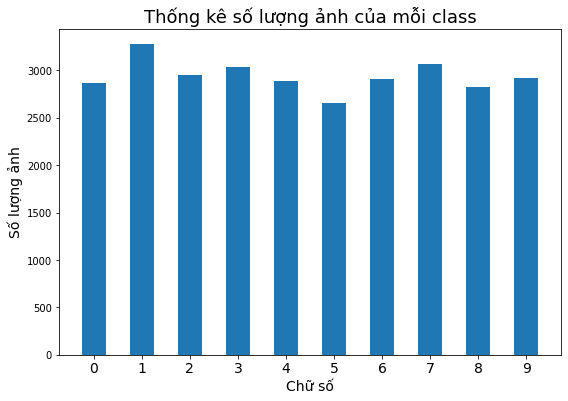

In [ ]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
counts = [0]*10

for i in range(0, len(train)):
    index = train['label'].values[i]
    counts[index] += 1
    
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(digits, counts, width=0.5)

ax.set_title('Thống kê số lượng ảnh của mỗi class', fontsize=18)
ax.set_xlabel('Chữ số', fontsize=14)
ax.set_ylabel('Số lượng ảnh', fontsize=14)

plt.xticks(digits, fontsize=14)

plt.show()

In [ ]:
X = train.iloc[:, 1:]
y0 = train.iloc[:, 0]

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y0

0        1
1        0
2        1
3        4
4        0
        ..
29395    7
29396    4
29397    0
29398    5
29399    1
Name: label, Length: 29400, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y0)
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
X_images = X.values.reshape(-1,28,28)
test_images = test.values.reshape(-1,28,28)

print(X_images.shape)
print(test_images.shape)

(29400, 28, 28)
(12600, 28, 28)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size = 0.2, random_state=90)

In [ ]:
print("X train shape is: ",X_train.shape)
print("Y train shape is: ",y_train.shape)
print("X test shape is: ",X_test.shape)
print("Y test shape is: ",y_test.shape)

X train shape is:  (23520, 28, 28)
Y train shape is:  (23520, 10)
X test shape is:  (5880, 28, 28)
Y test shape is:  (5880, 10)


In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

In [ ]:
test_images2 = test_images/255.0

test = test_images2.reshape(-1,28,28,1).astype('float32')

In [ ]:
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import  Activation, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
#Initialize the model
model = Sequential()
  
#The first set of CONV -> ReLU -> POOL layers
model.add(Conv2D(32, (4, 4), padding="same", input_shape=(28,28,1))) #same là dùng padding, valid là không
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#The second set of CONV -> ReLU -> POOl layers
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


#The set of FC -> ReLU layers
model.add(Flatten())
model.add(Dense(50))
model.add(Activation("relu"))

#The softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))


In [ ]:
#Build and Compile the model
print('[INFO] Building and compiling the Lenet model...')

model.compile(loss="categorical_crossentropy",
              optimizer=SGD(lr=0.01),
              metrics=["accuracy"])

[INFO] Building and compiling the Lenet model...


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [ ]:
print('[INFO] Training the model...')

history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=1)

[INFO] Training the model...
Epoch 1/50
184/184 [==============================] - 2s 11ms/step - loss: 2.2435 - accuracy: 0.1805 - val_loss: 1.6638 - val_accuracy: 0.6520
Epoch 2/50
184/184 [==============================] - 2s 9ms/step - loss: 1.1753 - accuracy: 0.7329 - val_loss: 0.5953 - val_accuracy: 0.8061
Epoch 3/50
184/184 [==============================] - 2s 9ms/step - loss: 0.4808 - accuracy: 0.8510 - val_loss: 0.3789 - val_accuracy: 0.8879
Epoch 4/50
184/184 [==============================] - 2s 9ms/step - loss: 0.3521 - accuracy: 0.8931 - val_loss: 0.3500 - val_accuracy: 0.8854
Epoch 5/50
184/184 [==============================] - 2s 9ms/step - loss: 0.3194 - accuracy: 0.9025 - val_loss: 0.2735 - val_accuracy: 0.9167
Epoch 6/50
184/184 [==============================] - 2s 9ms/step - loss: 0.2703 - accuracy: 0.9177 - val_loss: 0.2585 - val_accuracy: 0.9226
Epoch 7/50
184/184 [==============================] - 2s 9ms/step - loss: 0.2429 - accuracy: 0.9276 - val_loss: 0.2236

In [ ]:
print('[INFO] Evaluating the Model...')
(eval_loss, eval_accuracy) = model.evaluate(X_test,
                                            y_test,
                                            batch_size = 128,
                                            verbose=1)
print('[INFO] accuracy: {:.2f}%'.format(eval_accuracy*100))
print('[INFO] Loss: {}'.format(eval_loss))

[INFO] Evaluating the Model...
46/46 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9801
[INFO] accuracy: 98.01%
[INFO] Loss: 0.06634354591369629


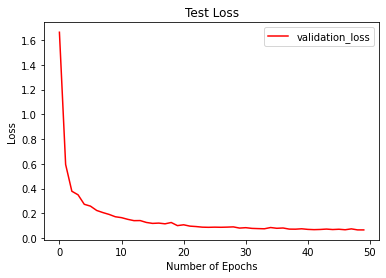

In [ ]:
plt.plot(history.history["val_loss"],color="r",label="validation_loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

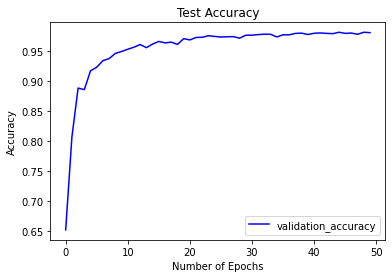

In [ ]:
plt.plot(history.history["val_accuracy"],color="b",label="validation_accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
result = model.predict(test)

In [ ]:
submit = pd.DataFrame(np.argmax(result, axis=1), 
                      columns=['Label'], 
                      index=pd.read_csv('/content/drive/MyDrive/MNIST/sample_submission_new.csv')['ImageId'])

In [ ]:
submit.index.name = 'ImageId'
submit.to_csv('submission.csv')

In [ ]:
submit

,Label
ImageId,
1,3
2,2
3,7
4,6
5,6
...,...
12596,0
12597,1
12598,7
